# Fase 4 Modelado
 
En este notebook se presentan los modelos seleccionados para las tareas de regresión y clasificación, mostrando los resultados más destacados y el análisis comparativo de desempeño.

In [3]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import time
from matplotlib import pyplot as plt

import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import xgboost as xgb

%load_ext kedro.ipython


[11/27/25 17:38:54] INFO     Using                                                                  ]8;id=653580;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=687922;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\framework\project\__init__.py#270\270]8;;\
                             'c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Li                
                             b\site-packages\kedro\framework\project\rich_logging.yml' as logging                  
                             configuration.                                                                        

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=672308;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=520530;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=44481;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=900852;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=414313;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=650407;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#180\180]8;;\
                             c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\proyecto                
                             -ml.                                                                                  
                             To set a different path, run '%reload_kedro <project_root>'                           

[11/27/25 17:39:00] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=105700;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=128960;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/27/25 17:39:01] INFO     Kedro project proteyecto-ml                                            ]8;id=180667;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=543706;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=776597;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=795424;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#147\147]8;;\
                             'pipelines'                                                                           

[11/27/25 17:39:04] INFO     Registered line magic 'run_viz'                                        ]8;id=93808;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=383880;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#153\153]8;;\

In [4]:
# Cargar datos y preparar variables
data_r5 = catalog.load("data_final")
X = data_r5[[
    'gamemode',        # tipo de partida
    'winrole',         # atacante o defensor
    'endroundreason',  # cómo terminó la ronda
    'roundduration',   # cuánto duró
    'isdead',          # si el jugador murió
    'nbkills',         # número de eliminaciones
]]
y = data_r5['impact_score']

[11/27/25 17:39:05] INFO     Loading data from data_final (CSVDataset)...                      ]8;id=159992;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=614887;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [5]:
# División de datos y escalado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Entrenamiento y predicción con XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
start = time.time()
xgb_model.fit(X_train_scaled, y_train)
end = time.time()
print(f"\n Entrenamiento completado en {end - start:.2f} segundos")
y_pred = xgb_model.predict(X_test_scaled)


 Entrenamiento completado en 2.12 segundos


In [7]:
# Evaluación de resultados
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f" MAE:  {mae:.4f}")
print(f" MSE:  {mse:.4f}")
print(f" RMSE: {rmse:.4f}")
print(f" R2:   {r2:.4f}")

 MAE:  0.0694
 MSE:  0.0069
 RMSE: 0.0831
 R2:   0.9754


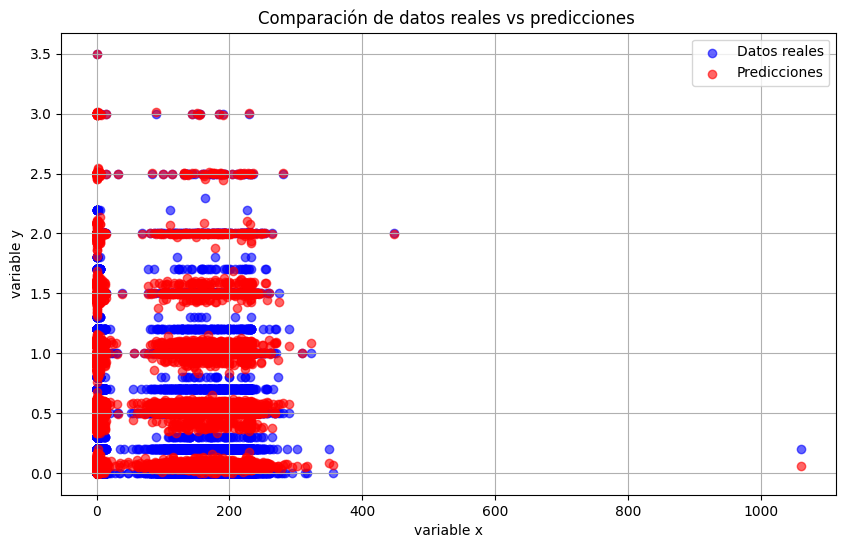

In [8]:
# Asegurarse de que todos tengan la misma longitud
# Convertir a arrays planos
X_plot = np.array(X_test).reshape(-1)
y_test_plot = np.array(y_test).reshape(-1)
y_pred_plot = np.array(y_pred).reshape(-1)

# Verificar que tengan la misma longitud
min_len = min(len(X_plot), len(y_test_plot), len(y_pred_plot))
X_plot = X_plot[:min_len]
y_test_plot = y_test_plot[:min_len]
y_pred_plot = y_pred_plot[:min_len]

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(X_plot, y_test_plot, color='blue', label='Datos reales', alpha=0.6)
plt.scatter(X_plot, y_pred_plot, color='red', label='Predicciones', alpha=0.6)

plt.xlabel('variable x')
plt.ylabel('variable y')
plt.title('Comparación de datos reales vs predicciones ')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# 5 Definir Grid de hiperparámetros (pequeño para no demorar demasiado)
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# 6 GridSearchCV
grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,               # validación cruzada de 3 folds
    scoring='r2',       # métrica para optimizar
    n_jobs=-1,
    verbose=1
)

# 7 Entrenamiento
start = time.time()
grid.fit(X_train_scaled, y_train)
end = time.time()

print(f"\n GridSearch completado en {end - start:.2f} segundos")
print(f" Mejor combinación de parámetros: {grid.best_params_}")

# 8 Predicciones con mejor modelo
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# 9 Evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\n MAE:  {mae:.4f}")
print(f" MSE:  {mse:.4f}")
print(f" RMSE: {rmse:.4f}")
print(f" R2:   {r2:.4f}")

Fitting 3 folds for each of 243 candidates, totalling 729 fits


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:25                                                                                   │
│                                                                                                  │
│   22                                                                                             │
│   23 # 7 Entrenamiento                                                                           │
│   24 start = time.time()                                                                         │
│ ❱ 25 grid.fit(X_train_scaled, y_train)                                                           │
│   26 end = time.time()                                                                           │
│   27                                                                                             │
│   28 print(f"\n GridSearch completado en {end - start:.2f} segundos")                            │
│                                                                                                  │
│ c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\sklearn\bas │
│ e.py:1365 in wrapper                                                                             │
│                                                                                                  │
│   1362 │   │   │   │   │   prefer_skip_nested_validation or global_skip_validation               │
│   1363 │   │   │   │   )                                                                         │
│   1364 │   │   │   ):                                                                            │
│ ❱ 1365 │   │   │   │   return fit_method(estimator, *args, **kwargs)                             │
│   1366 │   │                                                                                     │
│   1367 │   │   return wrapper                                                                    │
│   1368                                                                                           │
│                                                                                                  │
│ c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\sklearn\mod │
│ el_selection\_search.py:1051 in fit                                                              │
│                                                                                                  │
│   1048 │   │   │   │                                                                             │
│   1049 │   │   │   │   return results                                                            │
│   1050 │   │   │                                                                                 │
│ ❱ 1051 │   │   │   self._run_search(evaluate_candidates)                                         │
│   1052 │   │   │                                                                                 │
│   1053 │   │   │   # multimetric is determined here because in the case of a callable            │
│   1054 │   │   │   # self.scoring the return type is only known after calling                    │
│                                                                                                  │
│ c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\sklearn\mod │
│ el_selection\_search.py:1605 in _run_search                                                      │
│                                                                                                  │
│   1602 │                                                                                         │
│   1603 │   def _run_search(self, evaluate_candidates):                                           │
│   1604 │   │   """Search all candidates in param_grid"""                                         │
│ ❱ 1605 │   │   evaluate_candidates(ParameterGrid(self.param

In [ ]:
# Alinear y usando X e y originales
y_true = y.loc[X_test.index].to_numpy().reshape(-1)
y_pred_grid = best_model.predict(X_test_scaled).reshape(-1)

# Asegurar misma longitud
min_len = min(len(y_true), len(y_pred_grid))
y_true = y_true[:min_len]
y_pred_grid = y_pred_grid[:min_len]

# Gráfico: reales vs predicción
lims = (min(y_true.min(), y_pred_grid.min()), max(y_true.max(), y_pred_grid.max()))
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred_grid, alpha=0.4, s=10, color='tab:blue', label='Predicciones')
plt.plot(lims, lims, 'k--', linewidth=1, label='y = x')
plt.xlabel('Valor real (impact_score)')
plt.ylabel('Predicción (impact_score)')
plt.title('Reales vs Predicción (GridSearch)')
plt.legend()
plt.grid(True)
plt.xlim(lims); plt.ylim(lims)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Opcional: comparar frente a una característica de X (ej: 'roundduration' o 'nbkills')
feature = 'roundduration'  # cambiar por la columna de X que quieras visualizar
if feature in X_test.columns:
    x_feat = X_test[feature].to_numpy()[:min_len]
    plt.figure(figsize=(10, 4))
    plt.scatter(x_feat, y_true, s=8, alpha=0.6, label='Datos reales')
    plt.scatter(x_feat, y_pred_grid, s=8, alpha=0.6, label='Predicciones')
    plt.xlabel(feature)
    plt.ylabel('impact_score')
    plt.title(f'Predicción y real vs {feature}')
    plt.legend()
    plt.grid(True)
    plt.show()



## Modelo clasificacion decision tree


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #Entrenamiento y test
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.tree # Árboles de decisión
from sklearn.model_selection import GridSearchCV

In [4]:
%load_ext kedro.ipython

[11/27/25 17:49:25] INFO     Using                                                                  ]8;id=173601;file://c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=36815;file://c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\framework\project\__init__.py#270\270]8;;\
                             'c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packa                
                             ges\kedro\framework\project\rich_logging.yml' as logging                              
                             configuration.                                                                        

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=278475;file://c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=309799;file://c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\ipython\__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=230762;file://c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=642072;file://c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\ipython\__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=784831;file://c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=282044;file://c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\ipython\__init__.py#180\180]8;;\
                             c:\Users\nachi\Desktop\rainbow\Rainbow_six_kedro_ml\proyecto-ml.                      
                             To set a different path, run '%reload_kedro <project_root>'                           

[11/27/25 17:49:26] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=922020;file://c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=532826;file://c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/27/25 17:49:27] INFO     Kedro project proteyecto-ml                                            ]8;id=846248;file://c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=204913;file://c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\ipython\__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=22348;file://c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=340547;file://c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\ipython\__init__.py#147\147]8;;\
                             'pipelines'                                                                           

[11/27/25 17:49:28] INFO     Registered line magic 'run_viz'                                        ]8;id=656253;file://c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=103327;file://c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\ipython\__init__.py#153\153]8;;\

In [5]:
data_c4 = catalog.load("data_final")

[11/27/25 17:49:35] INFO     Loading data from data_final (CSVDataset)...                      ]8;id=229626;file://c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=558500;file://c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\io\core.py:277 in │
│ load                                                                                             │
│                                                                                                  │
│ c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro_datasets\pandas\c │
│ sv_dataset.py:171 in load                                                                        │
│                                                                                                  │
│ c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\parsers\reade │
│ rs.py:1026 in read_csv                                                                           │
│                                                                                                  │
│ c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\parsers\reade │
│ rs.py:620 in _read                                                                               │
│                                                                                                  │
│ c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\parsers\reade │
│ rs.py:1620 in __init__                                                                           │
│                                                                                                  │
│ c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\parsers\reade │
│ rs.py:1880 in _make_engine                                                                       │
│                                                                                                  │
│ c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\common.py:873 │
│ in get_handle                                                                                    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
FileNotFoundError: [Errno 2] No such file or directory: 
'C:/Users/nachi/Desktop/rainbow/Rainbow_six_kedro_ml/proyecto-ml/data/02_intermediate/data_final.csv'

The above exception was the direct cause of the following exception:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 data_c4 = catalog.load("data_final")                                                         │
│   2                                                                                              │
│                                                                                                  │
│ c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\io\data_catalog.p │
│ y:1053 in load                                                                                   │
│                                                                                                  │
│ c:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\io\core.py:284 in │
│ load                                                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
DatasetError: Failed while loading data from dataset 
kedro_datasets.pandas.csv_dataset.CSVDataset(filepath=PurePosixPath('C:/Users/nachi/Desktop/rainbow/Rainbow_six_ked
ro_ml/proyecto-ml/data/02_intermediate/data_final.csv'), protocol='file', load_args={}, save_args={'index': 
False}).
[Errno 2] No such file or directory: 
'C:/Users/

In [6]:
X = data_c4[['primaryweapon', 'mapname', 'gamemode', 'winrole',
    'roundduration', 'nbkills', 'isdead']]
y = data_c4['haswon']

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 X = data_c4[['primaryweapon', 'mapname', 'gamemode', 'winrole',                              │
│   2 │   'roundduration', 'nbkills', 'isdead']]                                                   │
│   3 y = data_c4['haswon']                                                                        │
│   4                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'data_c4' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Asegurarse de que X_train y y_train estén definidos.
# Si no existen, intentamos crear el split usando X e y ya definidos en el notebook.
if 'X_train' not in globals() or 'y_train' not in globals():
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    except NameError:
        raise NameError("X e y no están definidos. Ejecuta la celda que crea X e y antes de entrenar el modelo.")

model = DecisionTreeClassifier(
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight={0: 1, 1: 2.8},
    random_state=42
) 

# Entrenar el modelo
model.fit(X_train, y_train)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


In [ ]:
predictions = model.predict(X)
print(predictions[0:10])

In [ ]:
# Evaluar el modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

In [ ]:
#grafico confusion matrix con seaborn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[f'Pred {c}' for c in model.classes_],
            yticklabels=[f'True {c}' for c in model.classes_])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (counts)')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

y_train_pred_proba = model.predict_proba(X_train)[:, 1]
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

print("AUC Train:", roc_auc_score(y_train, y_train_pred_proba))
print("AUC Test:", roc_auc_score(y_test, y_test_pred_proba))

In [ ]:

cm = confusion_matrix(y_test, y_pred)

# Extrae los valores de la matriz de confusión
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calcula la sensibilidad (Recall)
sensitivity = TP / (TP + FN)

# Calcula la especificidad
specificity = TN / (TN + FP)

print(f"\nSensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

In [ ]:
# Visualizar el árbol de decisión con profundidad limitada
plt.figure(figsize=(20,10))
sklearn.tree.plot_tree(model, feature_names=X.columns, max_depth=3, filled=True)
plt.title("Decision Tree (limited depth)")
plt.show()


In [ ]:
# Obtener probabilidades positivas
y_scores = model.predict_proba(X_test)[:, 1]

# ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = average_precision_score(y_test, y_scores)

# Estilo: intentar usar seaborn de forma segura
try:
    import seaborn as sns
    sns.set_style('darkgrid')
except Exception:
    # Fallback: try a matplotlib seaborn-compatible style name, else default
    try:
        plt.style.use('seaborn-v0_8')
    except Exception:
        plt.style.use('default')

plt.figure(figsize=(14, 6))

# Plot ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color="C0", lw=2, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--", label="Aleatorio")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")

# Plot Precision-Recall
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color="C1", lw=2, label=f"AP = {pr_auc:.4f}")
# baseline removed as requested
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall")
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

In [ ]:
# Generar curvas ROC y Precision-Recall usando el mejor modelo encontrado por GridSearchCV (best_model)

# Probabilidades positivas del mejor modelo sobre el conjunto de test
y_scores_best = best_model.predict_proba(X_test)[:, 1]

# ROC
fpr_b, tpr_b, _ = roc_curve(y_test, y_scores_best)
roc_auc_b = auc(fpr_b, tpr_b)

# Precision-Recall
precision_b, recall_b, _ = precision_recall_curve(y_test, y_scores_best)
pr_auc_b = average_precision_score(y_test, y_scores_best)

# Estilo y plot
try:
    sns.set_style('darkgrid')
except Exception:
    pass

plt.figure(figsize=(14, 6))

# ROC
plt.subplot(1, 2, 1)
plt.plot(fpr_b, tpr_b, color="C2", lw=2, label=f"AUC = {roc_auc_b:.4f}")
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--", label="Aleatorio")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Curva ROC - best_model (GridSearchCV)")
plt.legend(loc="lower right")

# Precision-Recall
plt.subplot(1, 2, 2)
plt.plot(recall_b, precision_b, color="C3", lw=2, label=f"AP = {pr_auc_b:.4f}")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall - best_model (GridSearchCV)")
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Imprimir métricas resumidas
print(f"ROC AUC (best_model): {roc_auc_b:.4f}")
print(f"Average Precision (best_model): {pr_auc_b:.4f}")

## Conclusiones

## Rendimiento
Métricas Principales:
Exactitud (Accuracy): 88.6%

Precisión: 89% promedio

Sensibilidad (Recall): 84.9%

Especificidad: 91.9%

AUC: 95.96%

## Fortalezas 
Excelente Capacidad Predictiva
AUC de 95.96% indica clasificación casi perfecta

Random Forest supera típicamente a un solo Árbol de Decisión

Robustez contra Overfitting
Aunque hay diferencia entre AUC Train (95.99%) y Test (95.96%), es mínima (0.03%)

El modelo generaliza muy bien a datos no vistos

Manejo de Desbalance
class_weight={0: 1, 1: 2.8} compensa posibles desbalances

Buen balance entre precision y recall